## Line Plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib Version : ', mpl.__version__)

Matplotlib Version :  3.3.3


### 실습간 사용데이터
- New york stock exchange

In [13]:
stock = pd.read_csv('data/prices.csv')
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d', errors='raise')
stock.set_index('date', inplace=True)

apple = stock[stock['symbol']=='AAPL']
google = stock[stock['symbol']=='GOOGL']
google_rolling = google.rolling(window=4).mean() # 이동평균 데이터

stock.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


### 1. 기본 Line Plot()
- 왠만하면 정렬된 상태여야됨.
- 정사각형이나 원 등도 그릴 수 있음.

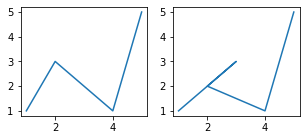

In [2]:
# figure 생성 및 ax를 subplot 2개 짜리로 만듬.
fig, axes = plt.subplots(1, 2, figsize=(5,2))

x1 = [1,2,3,4,5]
x2 = [1,3,2,4,5]
y = [1,3,2,1,5]

axes[0].plot(x1,y)
axes[1].plot(x2,y)

plt.show()

### 2. Ploy 변형하기
- 3가지요소를 통해 변형
    - 색(color)
    - 마커(Marker)
    - 선의 종류(linestyle) : solid, dashed, dashdot, dotted, None)

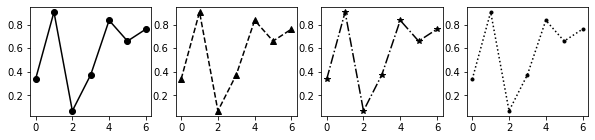

In [3]:
# figure 생성 및 ax를 subplot 2개 짜리로 만듬.
fig, axes = plt.subplots(1, 4, figsize=(10,2))

x = np.arange(7)
y = np.random.rand(7)

axes[0].plot(x, y, color='black', marker='o', linestyle='solid')
axes[1].plot(x, y, color='black', marker='^', linestyle='dashed')
axes[2].plot(x, y, color='black', marker='*', linestyle='dashdot')
axes[3].plot(x, y, color='black', marker='.', linestyle='dotted')

plt.show()

## 3. 실제 데이터 (google, apple 주가)
- 이동평균이나 smoothing 데이터를 통해 좀더 부드러운 그래프 확인 가능

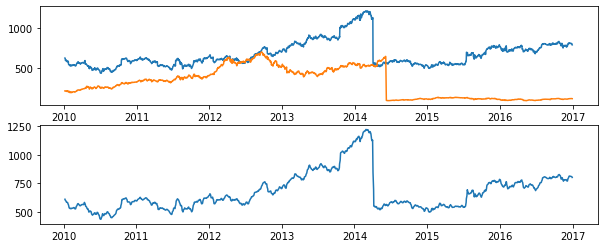

In [14]:
# figure 생성 및 ax를 subplot 2개 짜리로 만듬.
fig, ax = plt.subplots(2, 1, figsize=(10,4))

ax[0].plot(google.index, google['close'])
ax[0].plot(apple.index, apple['close'])
ax[1].plot(google_rolling.index, google_rolling['close'])

plt.show()

### 4. 간격

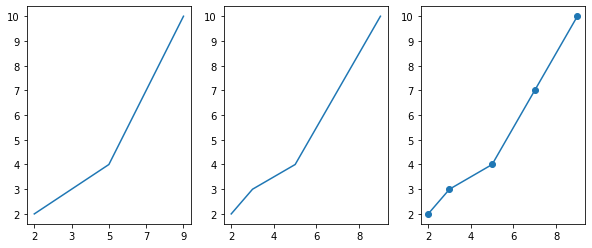

In [15]:
x = [2,3,5,7,9]
y = [2,3,4,7,10]

fig, ax = plt.subplots(1, 3, figsize=(10,4))
ax[0].plot([str(i) for i in x], y)
ax[1].plot(x, y)
ax[2].plot(x, y, marker='o')

plt.show()

### 5. 이중 축 사용
- 가독성이 높지 않아서 꼭 필요할 때만 사용
- twinx() 사용 : 같은 정보일때 많이 사용
- secondary-xaxis() : 다른 정보일때 많이 사용


### 6. 라벨에 텍스트 달기
- 라인에서 텍스트를 적어서 가독성을 높이는게 일반적